In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 1) READ
df = pd.read_csv("wifi.csv")


In [3]:
df.head()

,participant,timestamp,ssid,bssid,timestamp_UTC
0,AMdzA,2023-07-11 06:30:45.850004,37fc5a5f50e319f5b2c048ec53f0cfb6,5fa374a6d38fcc7b0e755cacaaaf9925,1.689050e+09
1,AMdzA,2023-07-11 15:25:44.248056,37fc5a5f50e319f5b2c048ec53f0cfb6,5fa374a6d38fcc7b0e755cacaaaf9925,1.689082e+09
2,AMdzA,2023-07-11 20:18:03.402486,37fc5a5f50e319f5b2c048ec53f0cfb6,5fa374a6d38fcc7b0e755cacaaaf9925,1.689099e+09
3,AMdzA,2023-07-11 22:45:32.471616,37fc5a5f50e319f5b2c048ec53f0cfb6,5fa374a6d38fcc7b0e755cacaaaf9925,1.689108e+09
4,AMdzA,2023-07-12 01:35:35.719675,37fc5a5f50e319f5b2c048ec53f0cfb6,5fa374a6d38fcc7b0e755cacaaaf9925,1.689119e+09


In [4]:
# 2) IDENTIFY missing / wrong
print("missing before:\n", df.isna().sum())

missing before:
 participant         0
timestamp           0
ssid             9488
bssid            9492
timestamp_UTC       0
dtype: int64


In [5]:
# 3) IMPUTE / FIX
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns

print("NUMERIC columns:")
print(num_cols)

print("\nCATEGORICAL columns:")
print(cat_cols)

NUMERIC columns:
Index(['timestamp_UTC'], dtype='object')

CATEGORICAL columns:
Index(['participant', 'timestamp', 'ssid', 'bssid'], dtype='object')


In [6]:
# numeric → mean
df[num_cols] = SimpleImputer(strategy='mean').fit_transform(df[num_cols])
# categorical → most frequent
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])


In [7]:
# verify
print("missing after:\n", df.isna().sum())


missing after:
 participant      0
timestamp        0
ssid             0
bssid            0
timestamp_UTC    0
dtype: int64


In [8]:
# 4) NORMALIZE numeric columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nNORMALIZED DATAFRAME PREVIEW:")
print(df.head())


NORMALIZED DATAFRAME PREVIEW:
  participant                   timestamp                              ssid  \
0       AMdzA  2023-07-11 06:30:45.850004  37fc5a5f50e319f5b2c048ec53f0cfb6   
1       AMdzA  2023-07-11 15:25:44.248056  37fc5a5f50e319f5b2c048ec53f0cfb6   
2       AMdzA  2023-07-11 20:18:03.402486  37fc5a5f50e319f5b2c048ec53f0cfb6   
3       AMdzA  2023-07-11 22:45:32.471616  37fc5a5f50e319f5b2c048ec53f0cfb6   
4       AMdzA  2023-07-12 01:35:35.719675  37fc5a5f50e319f5b2c048ec53f0cfb6   

                              bssid  timestamp_UTC  
0  5fa374a6d38fcc7b0e755cacaaaf9925       0.009242  
1  5fa374a6d38fcc7b0e755cacaaaf9925       0.021949  
2  5fa374a6d38fcc7b0e755cacaaaf9925       0.028893  
3  5fa374a6d38fcc7b0e755cacaaaf9925       0.032396  
4  5fa374a6d38fcc7b0e755cacaaaf9925       0.036436  


In [9]:
# 5) SAVE CLEANED
df.to_csv("wifi_cleaned.csv", index=False)


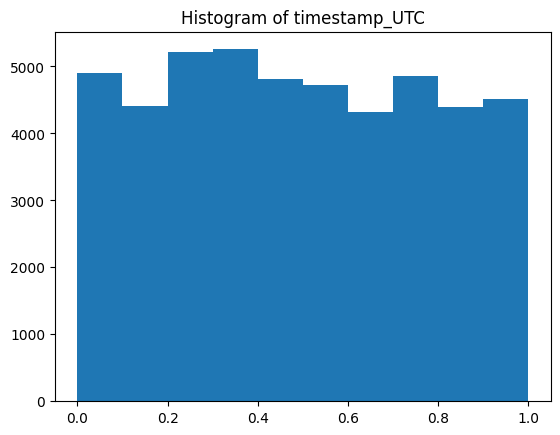

In [10]:
# 6) GRAPHS (simple)
# histogram of all numeric columns after cleaning
for c in num_cols:
    plt.figure()
    plt.hist(df[c])
    plt.title("Histogram of " + c)
    plt.show()

In [ ]:
# 7) SIMPLE INSIGHT EXAMPLE
print("\nTOP 10 SSIDs:")
print(df['ssid'].value_counts().head(10))